# Credit card fraud detection

Dataset https://drive.google.com/file/d/1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ/view

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Load data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Data preprocesisng

In [7]:
scaler = StandardScaler()
df_scaled = df.drop(['Class'], axis=1)
df_scaled = scaler.fit_transform(df_scaled)

df_scaled.shape

(284807, 30)

In [8]:
X = df_scaled
y = df['Class']

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train_val.shape, y_train_val.shape

((227845, 30), (227845,))

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.2)

In [11]:
X_train, X_test, X_val = np.array(X_train), np.array(X_test), np.array(X_val)
y_train, y_test, y_val = np.array(y_train).ravel(), np.array(y_test).ravel(), np.array(y_val).ravel()

## Logistic Regression

c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

Text(0.5, 0, 'C')

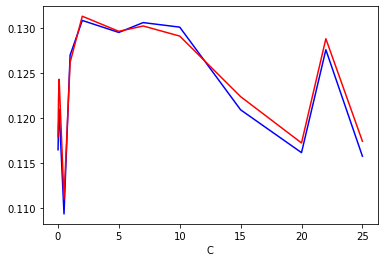

In [122]:
# l1 penalty
C_list = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 7, 10, 15, 20, 22, 25]
train_scores = []
val_scores = []
for C in C_list:
    log_reg = LogisticRegression(penalty='l1', C=C, class_weight='balanced', solver='saga', n_jobs=8)
    log_reg.fit(X_train, y_train)
    predictions = log_reg.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = log_reg.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))

plt.plot(C_list, train_scores, c='b')
plt.plot(C_list, val_scores, c='r')
plt.xlabel('C')

c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

Text(0.5, 0, 'C')

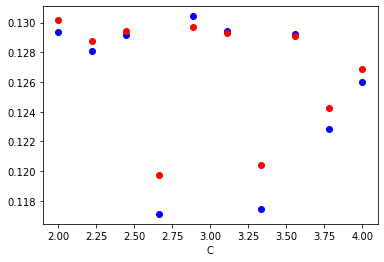

In [123]:
C_list = np.linspace(2, 4, 10)
train_scores = []
val_scores = []
for C in C_list:
    log_reg = LogisticRegression(penalty='l1', C=C, class_weight='balanced', solver='saga', n_jobs=8)
    log_reg.fit(X_train, y_train)
    predictions = log_reg.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = log_reg.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))

plt.scatter(C_list, train_scores, c='b')
plt.scatter(C_list, val_scores, c='r')
plt.xlabel('C')

In [124]:
C_l1 = C_list[np.argmax(val_scores)]
C_l1

2.0

In [125]:
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression(penalty='l1', C=C_l1, class_weight='balanced', solver='saga', n_jobs=8)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[55666  1198]
 [    7    91]]


c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### L2 penalty

c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

Text(0.5, 0, 'C')

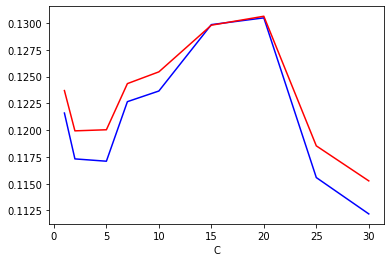

In [126]:
C_list = [1, 2, 5, 7, 10, 15, 20, 25, 30]
train_scores = []
val_scores = []
for C in C_list:
    log_reg = LogisticRegression(penalty='l2', C=C, class_weight='balanced', solver='saga', n_jobs=8)
    log_reg.fit(X_train, y_train)
    predictions = log_reg.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = log_reg.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(C_list, train_scores, c='b', )
plt.plot(C_list, val_scores, c='r')
plt.xlabel('C')

In [127]:
C_l2 = C_list[np.argmax(val_scores)]
C_l2

20

c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

Text(0.5, 0, 'C')

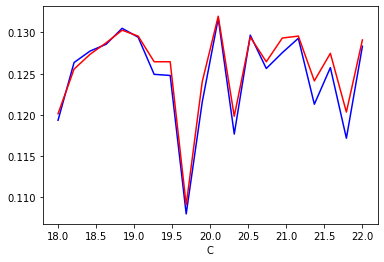

In [128]:
C_list = np.linspace(18, 22, 20)
train_scores = []
val_scores = []
for C in C_list:
    log_reg = LogisticRegression(penalty='l2', C=C, class_weight='balanced', solver='saga', n_jobs=8)
    log_reg.fit(X_train, y_train)
    predictions = log_reg.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = log_reg.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(C_list, train_scores, c='b', )
plt.plot(C_list, val_scores, c='r')
plt.xlabel('C')

In [131]:
C_l2 = C_list[np.argmax(val_scores)]
C_l2

20.105263157894736

In [132]:
log_reg = LogisticRegression(penalty='l2', C=C_l2, class_weight='balanced', solver='saga', n_jobs=8)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print(f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.13150289017341038
[[55669  1195]
 [    7    91]]


c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Elastic net 

In [133]:
C_list = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 7, 10, 15, 20]
l1_ratio_list = np.linspace(0.01, 1, 10)
best_scores = 0

for C in C_list:
    for l1_ratio in l1_ratio_list:
        log_reg = LogisticRegression(penalty='elasticnet', C=C, l1_ratio=l1_ratio, class_weight='balanced', solver='saga', n_jobs=8)
        log_reg.fit(X_train, y_train)
        predictions = log_reg.predict(X_train)
        scores = f1_score(y_train, predictions)
        if scores > best_scores:
            best_scores = scores
            C_elastic = C
            l1_ratio_elastic = l1_ratio
            best_log_reg = log_reg

best_scores, C_elastic, l1_ratio_elastic

c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

(0.1348155156102176, 0.01, 0.67)

In [135]:
predictions = best_log_reg.predict(X_test)
print(f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.1375661375661376
[[55730  1134]
 [    7    91]]


## Random forrest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Text(0.5, 0, 'N estimators')

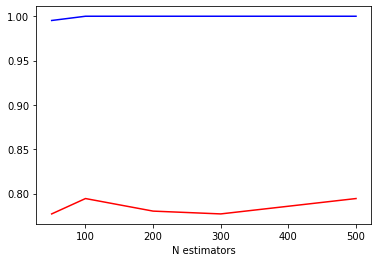

In [137]:
n_estimators_list = [50, 100, 200, 300, 500]
train_scores = []
val_scores = []
for n_esimators in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(n_estimators_list, train_scores, c='b', )
plt.plot(n_estimators_list, val_scores, c='r')
plt.xlabel('N estimators')

Text(0.5, 0, 'N estimators')

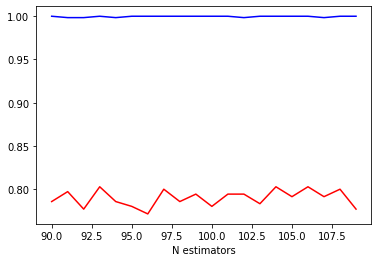

In [138]:
n_estimators_list = range(90, 110)
train_scores = []
val_scores = []
for n_esimators in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(n_estimators_list, train_scores, c='b', )
plt.plot(n_estimators_list, val_scores, c='r')
plt.xlabel('N estimators')

In [139]:
n_esimators = n_estimators_list[np.argmax(val_scores)]
n_esimators

93

Text(0.5, 0, 'Max depth')

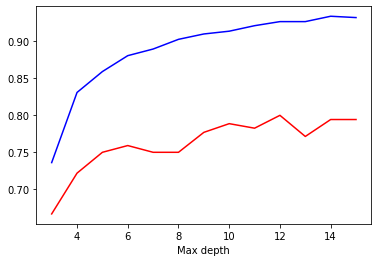

In [140]:
max_depth_list = range(3, 16)
train_scores = []
val_scores = []
for max_depth in max_depth_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, max_depth=max_depth, n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(max_depth_list, train_scores, c='b', )
plt.plot(max_depth_list, val_scores, c='r')
plt.xlabel('Max depth')

In [141]:
max_depth = max_depth_list[np.argmax(val_scores)]
max_depth

12

Text(0.5, 0, 'Min samples split')

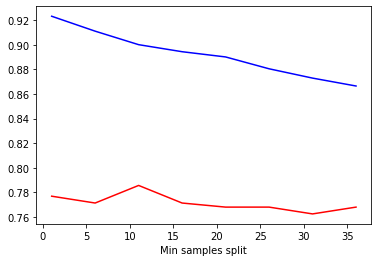

In [142]:
min_samples_split_list = range(1, 40, 5)
train_scores = []
val_scores = []
for min_samples_split in min_samples_split_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, max_depth=max_depth, min_samples_split=min_samples_split, n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(min_samples_split_list, train_scores, c='b', )
plt.plot(min_samples_split_list, val_scores, c='r')
plt.xlabel('Min samples split')

Text(0.5, 0, 'Min samples split')

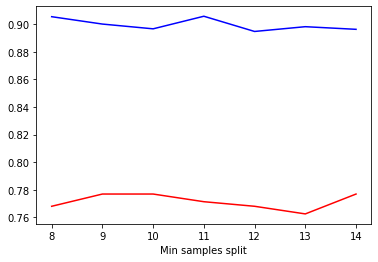

In [143]:
min_samples_split_list = range(8, 15)
train_scores = []
val_scores = []
for min_samples_split in min_samples_split_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, max_depth=max_depth, min_samples_split=min_samples_split, n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(min_samples_split_list, train_scores, c='b', )
plt.plot(min_samples_split_list, val_scores, c='r')
plt.xlabel('Min samples split')

In [144]:
min_samples_split = min_samples_split_list[np.argmax(val_scores)]
min_samples_split

9

Text(0.5, 0, 'Min samples leaf')

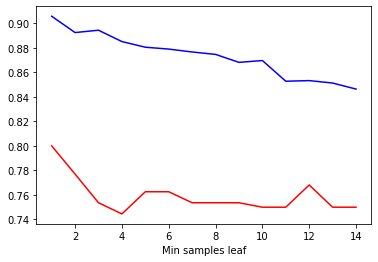

In [145]:
min_samples_leaf_list = range(1,15)
train_scores = []
val_scores = []
for min_samples_leaf in min_samples_leaf_list:
    rf_clf = RandomForestClassifier(n_estimators=n_esimators, 
                                    max_depth=max_depth, 
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    n_jobs=8)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_train)
    train_scores.append(f1_score(y_train, predictions))
    predictions = rf_clf.predict(X_val)
    val_scores.append(f1_score(y_val, predictions))
plt.plot(min_samples_leaf_list, train_scores, c='b', )
plt.plot(min_samples_leaf_list, val_scores, c='r')
plt.xlabel('Min samples leaf')

In [146]:
min_samples_leaf = min_samples_leaf_list[np.argmax(val_scores)]
min_samples_leaf

1

In [148]:
rf_clf = RandomForestClassifier(n_estimators=n_esimators, 
                                    max_depth=max_depth, 
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    n_jobs=8,
                                    )
rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
print(f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8539325842696629
[[56860     4]
 [   22    76]]


## Neural network 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [13]:
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
weight_for_0, weight_for_1

(5.495683140892829e-06, 0.0031746031746031746)

In [14]:
def get_model():
    model = keras.Sequential(
        [
            keras.layers.Dense(
                256, activation="relu", input_shape=(X_train.shape[-1],)
            ),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-trai

In [15]:
model = get_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), 
    loss="binary_crossentropy", 
    metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
)

In [16]:
history = model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=100,
    verbose=2,
    validation_data=(X_val, y_val),
    class_weight= {0: weight_for_0, 1: weight_for_1},
)

Epoch 1/100
90/90 - 4s - loss: 2.8085e-06 - precision: 0.0138 - recall: 0.8889 - val_loss: 0.0721 - val_precision: 0.1895 - val_recall: 0.9114 - 4s/epoch - 40ms/step
Epoch 2/100
90/90 - 2s - loss: 1.9969e-06 - precision: 0.0426 - recall: 0.9175 - val_loss: 0.1858 - val_precision: 0.0266 - val_recall: 0.9620 - 2s/epoch - 26ms/step
Epoch 3/100
90/90 - 2s - loss: 2.1452e-06 - precision: 0.0286 - recall: 0.9206 - val_loss: 0.1022 - val_precision: 0.0611 - val_recall: 0.9494 - 2s/epoch - 26ms/step
Epoch 4/100
90/90 - 2s - loss: 1.4901e-06 - precision: 0.0411 - recall: 0.9429 - val_loss: 0.1504 - val_precision: 0.0447 - val_recall: 0.9494 - 2s/epoch - 26ms/step
Epoch 5/100
90/90 - 2s - loss: 1.3555e-06 - precision: 0.0424 - recall: 0.9460 - val_loss: 0.0965 - val_precision: 0.0696 - val_recall: 0.9241 - 2s/epoch - 26ms/step
Epoch 6/100
90/90 - 2s - loss: 1.4360e-06 - precision: 0.0504 - recall: 0.9302 - val_loss: 0.1068 - val_precision: 0.0406 - val_recall: 0.9367 - 2s/epoch - 26ms/step
Epoc

In [17]:
history.history.keys()

dict_keys(['loss', 'precision', 'recall', 'val_loss', 'val_precision', 'val_recall'])

In [24]:
train_precision = history.history['precision']
train_recall = history.history['recall']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

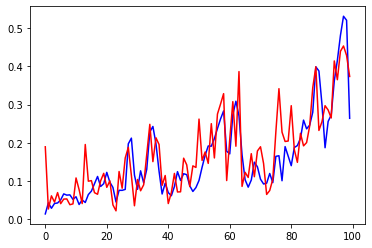

In [25]:
plt.plot(range(100), train_precision, c='b')
plt.plot(range(100), val_precision, c='r')

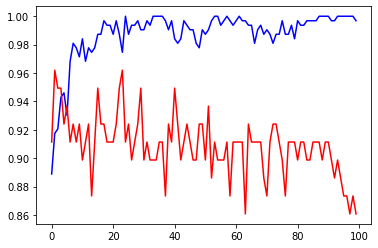

In [26]:
plt.plot(range(100), train_recall, c='b')
plt.plot(range(100), val_recall, c='r')

In [27]:
def f1(precision, recall):
    f1_score = np.zeros(len(precision))
    for i in range(len(precision)):
        f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    return f1_score

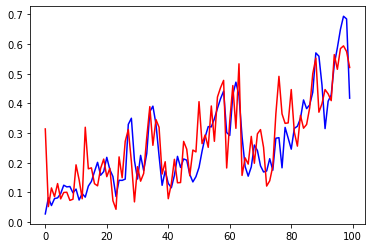

In [28]:
train_f1 = f1(train_precision, train_recall)
val_f1 = f1(val_precision, val_recall)
plt.plot(range(100), train_f1, c='b')
plt.plot(range(100), val_f1, c='r')

In [29]:
n_epochs = np.argmax(val_f1)
n_epochs

97

In [30]:
model = get_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), 
    loss="binary_crossentropy", 
    metrics=[keras.metrics.Precision(), keras.metrics.Recall()]
)

history = model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=n_epochs,
    verbose=2,
    validation_data=(X_val, y_val),
    class_weight= {0: weight_for_0, 1: weight_for_1},
)


Epoch 1/97
90/90 - 3s - loss: 3.2705e-06 - precision_1: 0.0101 - recall_1: 0.8762 - val_loss: 0.0756 - val_precision_1: 0.1573 - val_recall_1: 0.8861 - 3s/epoch - 38ms/step
Epoch 2/97
90/90 - 3s - loss: 2.0655e-06 - precision_1: 0.0378 - recall_1: 0.9016 - val_loss: 0.1232 - val_precision_1: 0.0757 - val_recall_1: 0.9114 - 3s/epoch - 28ms/step
Epoch 3/97
90/90 - 3s - loss: 1.6218e-06 - precision_1: 0.0477 - recall_1: 0.9206 - val_loss: 0.0697 - val_precision_1: 0.1235 - val_recall_1: 0.9241 - 3s/epoch - 28ms/step
Epoch 4/97
90/90 - 2s - loss: 1.4869e-06 - precision_1: 0.0396 - recall_1: 0.9365 - val_loss: 0.1207 - val_precision_1: 0.0545 - val_recall_1: 0.9494 - 2s/epoch - 27ms/step
Epoch 5/97
90/90 - 2s - loss: 1.0499e-06 - precision_1: 0.0486 - recall_1: 0.9460 - val_loss: 0.1212 - val_precision_1: 0.0299 - val_recall_1: 0.9367 - 2s/epoch - 27ms/step
Epoch 6/97
90/90 - 3s - loss: 8.9534e-07 - precision_1: 0.0434 - recall_1: 0.9587 - val_loss: 0.0868 - val_precision_1: 0.0398 - val_re

In [31]:
predictions_proba = model.predict(X_test)
predictions = np.where(predictions_proba > 0.5, 1,0)

In [34]:
print(f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7148936170212766
[[56811    53]
 [   14    84]]


### NN tuning

In [71]:
import keras_tuner as kt

In [90]:
def model_builder(hp):
    model = keras.Sequential()
    
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    hp_dropout = hp.Float('dropout', 0, 0.5, step=0.1)
    
    model.add(keras.Input(shape=X_train.shape[-1]))
    
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dropout(hp_dropout))

    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dropout(hp_dropout))

    model.add(keras.layers.Dense(1, activation="sigmoid"))
  
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

    return model

In [95]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_loss", direction="min"),
                     max_epochs=100,
                     factor=3)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [96]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), class_weight= {0: weight_for_0, 1: weight_for_1})

Trial 254 Complete [00h 29m 04s]
val_loss: 0.6240214705467224

Best val_loss So Far: 0.0038217203691601753
Total elapsed time: 1d 01h 55m 25s
INFO:tensorflow:Oracle triggered exit


In [97]:
best_model = tuner.get_best_models()[0]

In [98]:
predictions_proba = best_model.predict(X_test)
predictions = np.where(predictions_proba > 0.5, 1,0)

In [99]:
print(f1_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7912087912087913
[[56852    12]
 [   26    72]]
